In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile

<hr>
Modified   By   Reason <br>
14-Jan-23  CBL  Original, https://swharden.com/blog/2020-09-23-signal-filtering-in-python/
<hr>

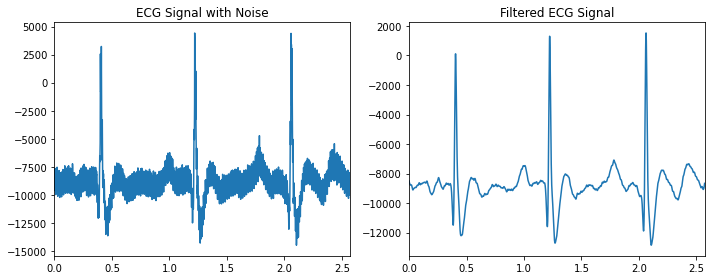

In [3]:
# read ECG data from the WAV file
sampleRate, data = scipy.io.wavfile.read('ecg.wav')
times            = np.arange(len(data))/sampleRate
"""
 apply a 3-pole lowpass filter at 0.1x Nyquist frequency
 butter arguments: 
 NPoles
 Wn <array_like>  The critical frequency or frequencies.
 btype{‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}
 analog bool
 output{‘ba’, ‘zpk’, ‘sos’}
 
 returns
 b,a <ndarray, ndarray> Numerator (b) and denominator (a) polynomials of the IIR filter. 
    Only returned if output='ba'.
"""
b, a = scipy.signal.butter(3, 0.1)
"""
filtfilt - 
b (N,) array_like
a (N,) array_like
x array_like, The array of data to be filtered.
"""
filtered = scipy.signal.filtfilt(b, a, data)

# plot the original data next to the filtered data
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(times, data)
plt.title("ECG Signal with Noise")
plt.margins(0, .05)

plt.subplot(122)
plt.plot(times, filtered)
plt.title("Filtered ECG Signal")
plt.margins(0, .05)

plt.tight_layout()
plt.show()


The second argument passed into the butter method customizes the cut-off frequency of the Butterworth filter. This value (Wn) is a number between 0 and 1 representing the fraction of the Nyquist frequency to use for the filter. Note that Nyquist frequency is half of the sample rate. As this fraction increases, the cutoff frequency increases. You can get fancy and express this value as 2 * Hz / sample rate.

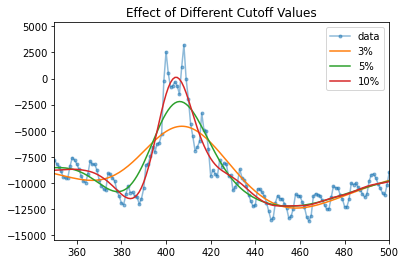

In [4]:
plt.plot(data, '.-', alpha=.5, label="data")

for cutoff in [.03, .05, .1]:
    b, a = scipy.signal.butter(3, cutoff)
    filtered = scipy.signal.filtfilt(b, a, data)
    label = f"{int(cutoff*100):d}%"
    plt.plot(filtered, label=label)

plt.legend()
plt.axis([350, 500, None, None])
plt.title("Effect of Different Cutoff Values")
plt.show()

Low-pass and high-pass filters can be selected simply by customizing the third argument passed into the filter. The second argument indicates frequency (as fraction of Nyquist frequency, half the sample rate). Passing a list of two values in for the second argument allows for band-pass filtering of a signal.

Text(0.5, 1.0, 'Band Pass')

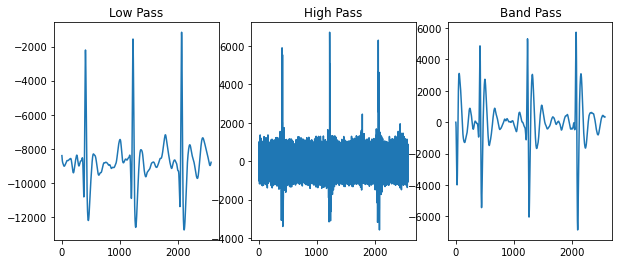

In [6]:
b, a = scipy.signal.butter(3, 0.05, 'lowpass')
filteredLowPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, 0.05, 'highpass')
filteredHighPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, [.01, .05], 'band')
filteredBandPass = scipy.signal.lfilter(b, a, data)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.plot(filteredLowPass)
plt.title("Low Pass")

plt.subplot(132)
plt.plot(filteredHighPass)
plt.title("High Pass")

plt.subplot(133)
plt.plot(filteredBandPass)
plt.title("Band Pass")

Another way to low-pass a signal is to use convolution. In this method you create a window (typically a bell-shaped curve) and convolve the window with the signal. The wider the window is the smoother the output signal will be. Also, the window must be normalized so its sum is 1 to preserve the amplitude of the input signal.

There are different ways to handle what happens to data points at the edges (see numpy.convolve for details), but setting mode to valid delete these points to produce an output signal slightly smaller than the input signal.

Text(0.5, 1.0, 'Filtered')

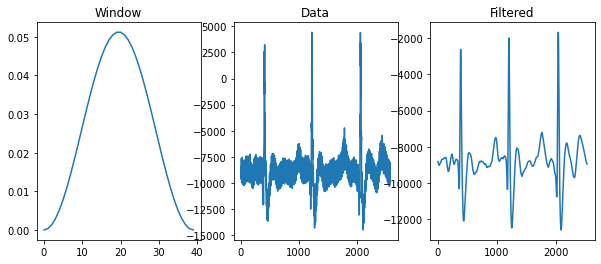

In [8]:
# create a normalized Hanning window
windowSize = 40
window = np.hanning(windowSize)
window = window / window.sum()

# filter the data using convolution
filtered = np.convolve(window, data, mode='valid')

plt.figure(figsize=(10, 4))
plt.subplot(131)
#plt.plot(kernel)
plt.plot(window)
plt.title("Window")

plt.subplot(132)
plt.plot(data)
plt.title("Data")

plt.subplot(133)
plt.plot(filtered)
plt.title("Filtered")